<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
grocery = pd.read_csv('grocery_sales.csv')

In [3]:
grocery

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2
...,...,...,...,...
73,Y,Bananas,902,3169.8
74,Y,Oranges,1441,6856.1
75,Z,Apples,1441,7209.0
76,Z,Bananas,1199,4440.5


In [4]:
pub_schools =  pd.read_csv('Public_Schools2.csv')

In [5]:
pub_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           131 non-null    float64
 1   y           131 non-null    float64
 2   objectid_1  131 non-null    int64  
 3   objectid    131 non-null    int64  
 4   bldg_id     131 non-null    int64  
 5   bldg_name   131 non-null    object 
 6   address     131 non-null    object 
 7   city        131 non-null    object 
 8   zipcode     131 non-null    int64  
 9   csp_sch_id  131 non-null    int64  
 10  sch_id      131 non-null    int64  
 11  sch_name    131 non-null    object 
 12  sch_label   131 non-null    object 
 13  sch_type    131 non-null    object 
 14  shared      16 non-null     object 
 15  complex     2 non-null      object 
 16  label       131 non-null    int64  
 17  tlt         131 non-null    int64  
 18  pl          131 non-null    object 
 19  point_x     131 non-null    f

In [6]:
ansur_f = pd.read_csv("ANSUR_II_FEMALE.csv")

In [7]:
ansur_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          1986 non-null   object 
 1   Component                       1986 non-null   object 
 2   Gender                          1986 non-null   object 
 3   abdominalextensiondepthsitting  1986 non-null   int64  
 4   acromialheight                  1986 non-null   int64  
 5   acromionradialelength           1986 non-null   int64  
 6   anklecircumference              1986 non-null   int64  
 7   axillaheight                    1986 non-null   int64  
 8   balloffootcircumference         1986 non-null   int64  
 9   balloffootlength                1986 non-null   int64  
 10  biacromialbreadth               1986 non-null   int64  
 11  bicepscircumferenceflexed       1986 non-null   int64  
 12  bicristalbreadth                19

In [8]:
ansur_m = pd.read_csv("ANSUR_II_MALE.csv")

In [9]:
ansur_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          4082 non-null   object 
 1   Component                       4082 non-null   object 
 2   Gender                          4082 non-null   object 
 3   abdominalextensiondepthsitting  4082 non-null   int64  
 4   acromialheight                  4082 non-null   int64  
 5   acromionradialelength           4082 non-null   int64  
 6   anklecircumference              4082 non-null   int64  
 7   axillaheight                    4082 non-null   int64  
 8   balloffootcircumference         4082 non-null   int64  
 9   balloffootlength                4082 non-null   int64  
 10  biacromialbreadth               4082 non-null   int64  
 11  bicepscircumferenceflexed       4082 non-null   int64  
 12  bicristalbreadth                40

In [10]:
ansur= pd.concat([ansur_f, ansur_m], axis=0, ignore_index=True)

In [11]:
ansur_small = ansur[['stature_m', 'chestcircumference', 'Gender', 'Height_class', 'weight_kg']]

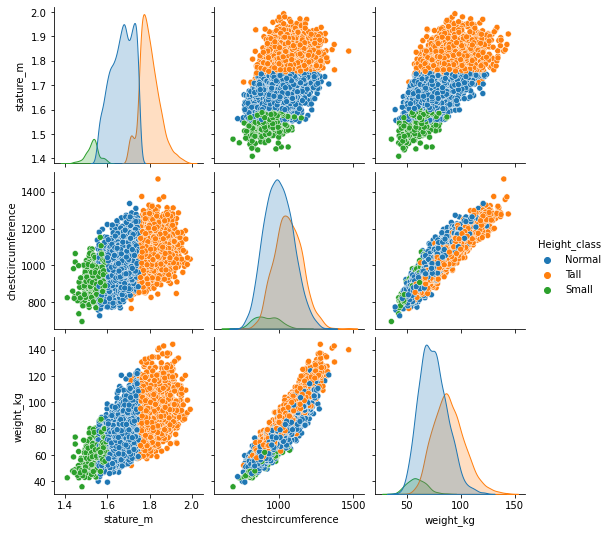

In [12]:
sns.pairplot(ansur_small, hue='Height_class');

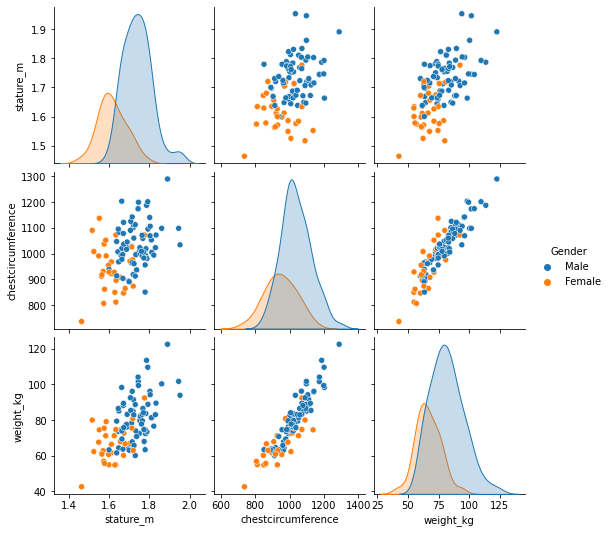

In [13]:
sns.pairplot(ansur_small.sample(100), hue='Gender');

In [42]:
ansur_small['weight_lbs'] = ansur_small['weight_kg'] * 2.20462

In [15]:
ansur_small

,stature_m,chestcircumference,Gender,Height_class,weight_kg,weight_lbs
0,1.560,922,Female,Normal,65.7,144.843534
1,1.665,839,Female,Normal,53.4,117.726708
2,1.711,874,Female,Tall,66.3,146.166306
3,1.660,1008,Female,Normal,78.2,172.401284
4,1.572,1089,Female,Normal,88.6,195.329332
...,...,...,...,...,...,...
6063,1.688,954,Male,Normal,67.5,148.811850
6064,1.765,1072,Male,Tall,89.6,197.533952
6065,1.690,1045,Male,Normal,83.2,183.424384
6066,1.718,984,Male,Normal,73.1,161.157722


In [16]:
ansur_bmi= ansur_small.drop(columns=['chestcircumference'])

In [17]:
ansur_bmi['bmi'] = ansur_bmi.weight_kg/ (ansur_bmi.stature_m ** 2)

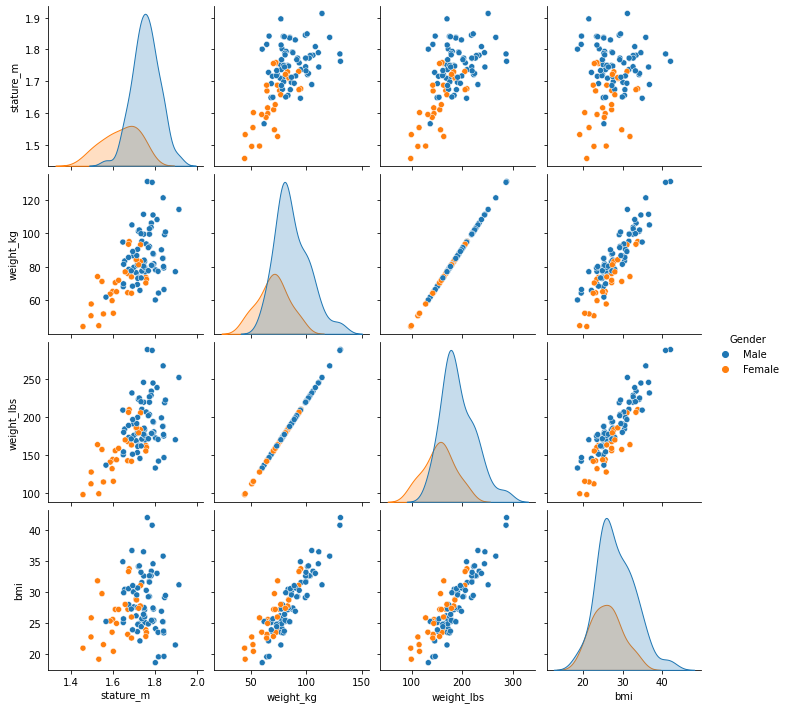

In [18]:
sns.pairplot(ansur_bmi.sample(100), hue='Gender');

In [19]:
ansur_bmi.corr()

,stature_m,weight_kg,weight_lbs,bmi
stature_m,1.000000,0.660265,0.660265,0.183094
weight_kg,0.660265,1.000000,1.000000,0.854700
weight_lbs,0.660265,1.000000,1.000000,0.854700
bmi,0.183094,0.854700,0.854700,1.000000


In [20]:
ansur_bmi_kg =  ansur_bmi.drop(columns=['weight_lbs'], axis=1)

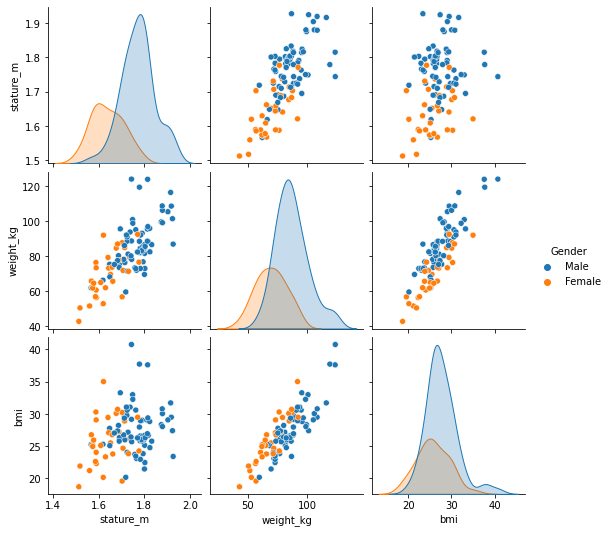

In [21]:
sns.pairplot(ansur_bmi_kg.sample(100), hue='Gender');

In [22]:
ansur.columns

Index(['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'fun

In [23]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']

# Drop the non-numerical columns from df
df_numeric = ansur.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


In [24]:
ansur['x'] = tsne_features[:,0]
ansur['y'] = tsne_features[:,1]

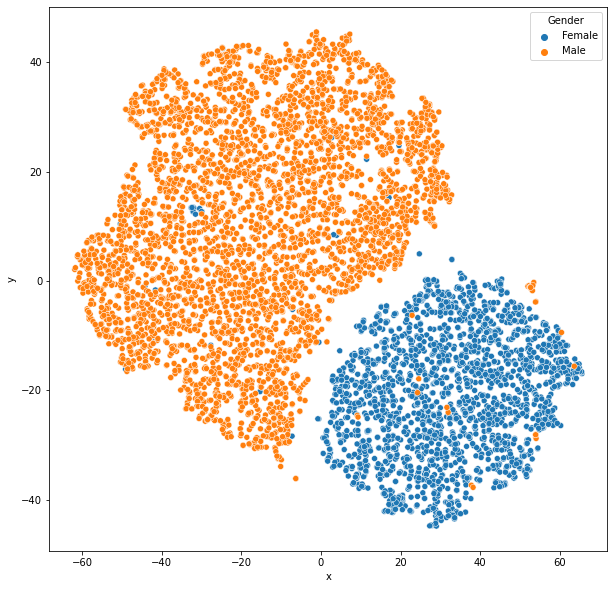

In [25]:
plt.figure(figsize=(10,10))
# Color the points according to Army Component
ax= sns.scatterplot(x="x", y="y", hue='Gender', data=ansur);

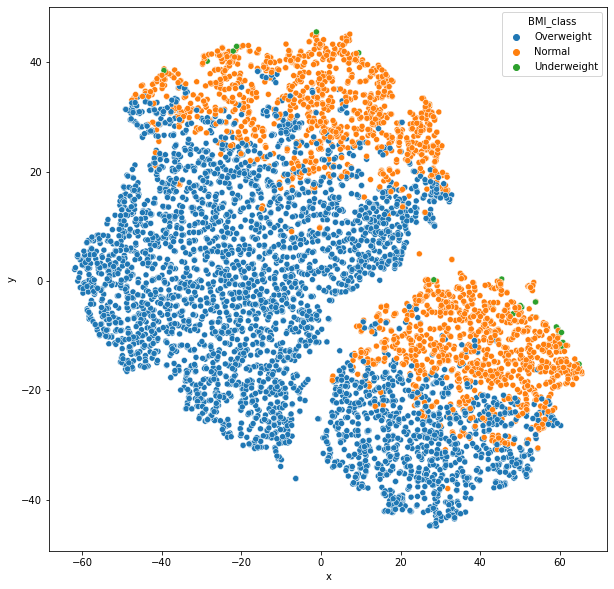

In [26]:
plt.figure(figsize=(10,10))
# Color the points according to Army Component
ax= sns.scatterplot(x="x", y="y", hue='BMI_class', data=ansur);

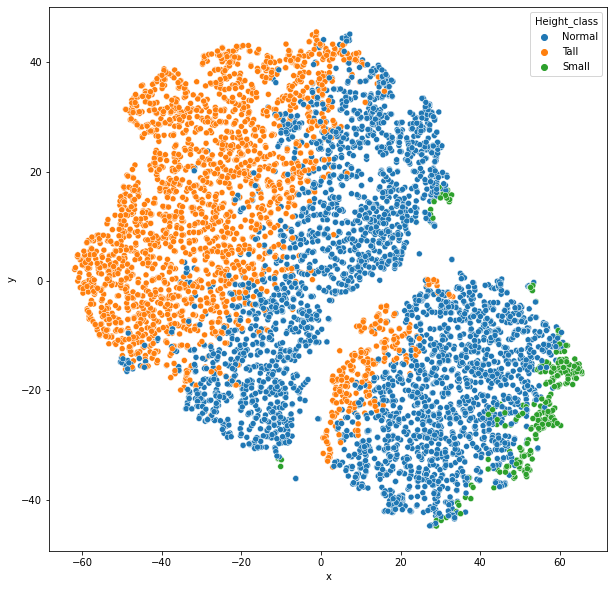

In [27]:
plt.figure(figsize=(10,10))
# Color the points according to Army Component
ax= sns.scatterplot(x="x", y="y", hue='Height_class', data=ansur);

In [28]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.005)

# Fit the selector to normalized head_df

sel.fit(df_numeric / df_numeric.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_ansur = df_numeric.loc[:, mask]

In [29]:
reduced_ansur.shape

(6068, 45)

## Diabetes Classifier
---

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
pima = pd.read_csv('Pimaindians.csv')

In [32]:
pima.columns

Index(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'family', 'age', 'test'],
      dtype='object')

In [33]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   392 non-null    int64  
 1   glucose    392 non-null    int64  
 2   diastolic  392 non-null    int64  
 3   triceps    392 non-null    int64  
 4   insulin    392 non-null    int64  
 5   bmi        392 non-null    float64
 6   family     392 non-null    float64
 7   age        392 non-null    int64  
 8   test       392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


In [34]:
X = pima.drop(columns=['test'])
y = pima['test']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [35]:
# Instanciando o StandardScaler e a Regressão logística
scaler = StandardScaler()
lr = LogisticRegression()

# Vamos fittar e transformar os dados de uma só vez
X_train_std = scaler.fit_transform(X_train)

# Treinando a regressão linear no X_train padronizado
lr.fit(X_train_std, y_train)

# Precisamos transformar os dados de test também
X_test_std = scaler.transform(X_test)

# Fazendo predições com os dados padronizados
y_pred = lr.predict(X_test_std)

# imprimindo as métricas de acurácia e os coeficientes de importância das features
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.23, 'diastolic': 0.03, 'triceps': 0.24, 'insulin': 0.19, 'bmi': 0.38, 'family': 0.35, 'age': 0.34}


In [36]:
X = X[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


In [37]:
# Remove the 2 features with the lowest model coefficients
X = X[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


In [38]:
# Only keep the feature with the highest coefficient
X = X[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

75.5% accuracy on test set.
{'glucose': 1.28}


In [39]:
from sklearn.feature_selection import RFE
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train_std, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test_std))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'glucose': 5}


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 8

## Random Forest for Ansur
---

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
X = df_numeric
y= pd.get_dummies(ansur.Gender, drop_first=True)

In [43]:
y.shape

(6068, 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(accuracy_score(y_test, rf.predict(X_test)))

0.990112063282795


In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.00168803 0.00079767 0.00052318 0.00075152 0.00066226 0.00644279
 0.0142673  0.06703509 0.00209114 0.00684279 0.02698613 0.02602281
 0.00051838 0.00531327 0.00112919 0.01252514 0.00286425 0.00083734
 0.00212836 0.0013655  0.00133685 0.0034184  0.00082761 0.00118633
 0.00731408 0.02631963 0.00047235 0.00784926 0.000491   0.00067026
 0.00079545 0.00171325 0.00050965 0.00227221 0.00476873 0.00490289
 0.00065096 0.05229025 0.00542275 0.00475589 0.00051288 0.03506611
 0.03424403 0.00036147 0.00099706 0.00095436 0.00064057 0.0285958
 0.00064542 0.01500207 0.02895915 0.00050728 0.00043732 0.00174452
 0.00779561 0.00037683 0.00103398 0.00124497 0.0153689  0.00504853
 0.00115894 0.1879892  0.10092714 0.0027027  0.00041977 0.00183856
 0.00616971 0.06822645 0.00119383 0.00205829 0.00612579 0.02266366
 0.00051238 0.00940737 0.00089087 0.00083374 0.00800799 0.0013232
 0.00041825 0.00082862 0.00045885 0.00093295 0.00133302 0.0133775
 0.00163416 0.00179864 0.0014768  0.00056922 0.00060547 0.0476690

In [47]:
mask = rf.feature_importances_ > 0.1
print(mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


In [48]:
X_reduced = X.loc[:, mask]
print(X_reduced.columns)

Index(['neckcircumference', 'neckcircumferencebase'], dtype='object')


In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(),
n_features_to_select=6, verbose=1)
rfe.fit(X_train,y_train)

Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 fe

RFE(estimator=RandomForestClassifier(), n_features_to_select=6, verbose=1)

In [50]:
print(accuracy_score(y_test, rfe.predict(X_test)))

0.989452867501648


In [51]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(),
n_features_to_select=6, step=10, verbose=1)
rfe.fit(X_train,y_train)

Fitting estimator with 94 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 44 features.
Fitting estimator with 34 features.
Fitting estimator with 24 features.
Fitting estimator with 14 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=6, step=10,
    verbose=1)

In [52]:
print(X.columns[rfe.support_])

Index(['biacromialbreadth', 'handcircumference', 'hipbreadthsitting',
       'neckcircumference', 'neckcircumferencebase', 'shouldercircumference'],
      dtype='object')


In [53]:
print(accuracy_score(y_test, rfe.predict(X_test)))

0.988793671720501


## PCA
---

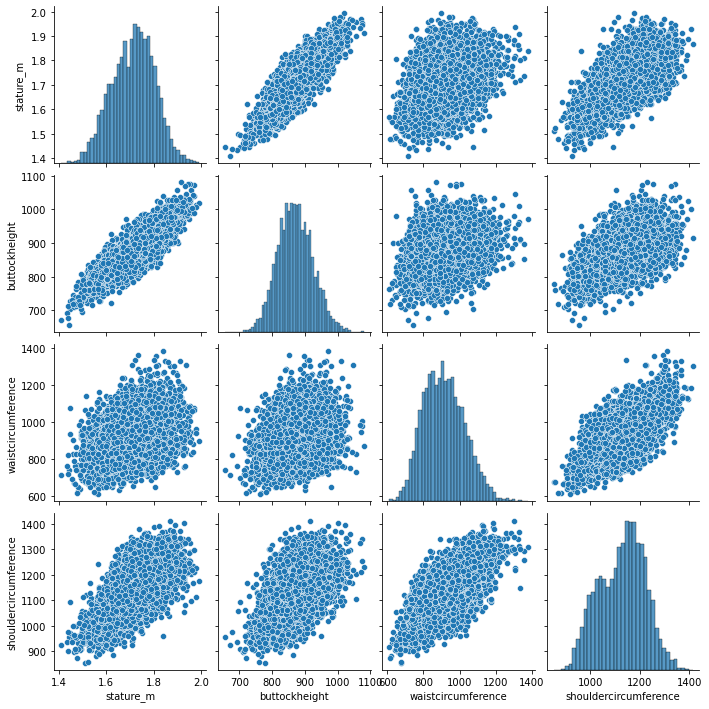

In [54]:
red_features = ['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']
sns.pairplot(df_numeric[red_features])

plt.show()

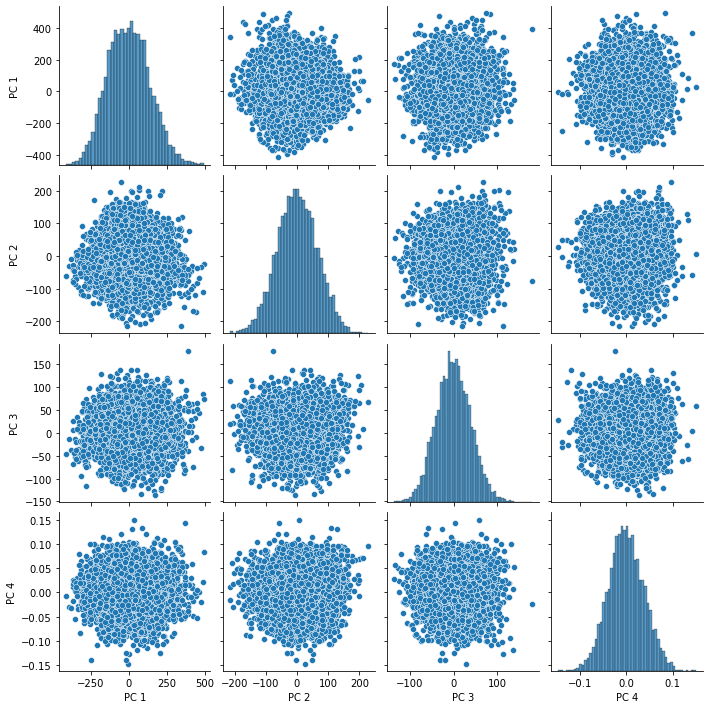

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

red_features = ['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(df_numeric[red_features])

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(df_numeric[red_features])
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA()

In [57]:
print(pca.explained_variance_ratio_)

[5.56363311e-01 1.30884134e-01 5.07999670e-02 3.15841769e-02
 2.10366372e-02 1.60557326e-02 1.36837911e-02 1.14965645e-02
 1.09549376e-02 9.79631899e-03 9.44852401e-03 8.72551080e-03
 6.71987242e-03 6.42825493e-03 6.39432700e-03 6.04392630e-03
 5.77611845e-03 5.68981048e-03 5.22906086e-03 4.81645074e-03
 4.40182008e-03 4.31344239e-03 4.12651012e-03 3.81708218e-03
 3.68569425e-03 3.33675568e-03 3.27646223e-03 2.85246914e-03
 2.83355001e-03 2.71736044e-03 2.53200136e-03 2.30390590e-03
 2.13355271e-03 2.04753262e-03 1.95629453e-03 1.93934442e-03
 1.86082547e-03 1.73854807e-03 1.63722727e-03 1.50201306e-03
 1.47031331e-03 1.41216297e-03 1.28840585e-03 1.27495046e-03
 1.19578587e-03 1.11417170e-03 1.07828908e-03 1.06858499e-03
 1.00999149e-03 9.71596079e-04 9.16195957e-04 8.71194367e-04
 8.37380124e-04 7.31829374e-04 6.88790562e-04 6.75821403e-04
 6.51372247e-04 6.24851691e-04 5.68612527e-04 5.29608035e-04
 5.22599930e-04 4.92612550e-04 4.50374192e-04 4.15727739e-04
 3.93808053e-04 3.895723

In [58]:
print(pca.explained_variance_ratio_.cumsum())

[0.55636331 0.68724745 0.73804741 0.76963159 0.79066823 0.80672396
 0.82040775 0.83190431 0.84285925 0.85265557 0.8621041  0.87082961
 0.87754948 0.88397773 0.89037206 0.89641599 0.90219211 0.90788192
 0.91311098 0.91792743 0.92232925 0.92664269 0.9307692  0.93458628
 0.93827198 0.94160873 0.94488519 0.94773766 0.95057121 0.95328857
 0.95582057 0.95812448 0.96025803 0.96230557 0.96426186 0.96620121
 0.96806203 0.96980058 0.97143781 0.97293982 0.97441013 0.9758223
 0.9771107  0.97838565 0.97958144 0.98069561 0.9817739  0.98284248
 0.98385247 0.98482407 0.98574027 0.98661146 0.98744884 0.98818067
 0.98886946 0.98954528 0.99019665 0.99082151 0.99139012 0.99191973
 0.99244233 0.99293494 0.99338531 0.99380104 0.99419485 0.99458442
 0.99495282 0.99529412 0.99561598 0.99592718 0.9962339  0.99653595
 0.99680951 0.99707569 0.99732044 0.99755505 0.99778472 0.99800784
 0.99821295 0.99840804 0.99859539 0.998777   0.99893791 0.99909196
 0.99924148 0.99938885 0.9995281  0.99964407 0.99974848 0.99983

In [59]:
X = df_numeric
y= pd.get_dummies(ansur.Gender, drop_first=True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [61]:
from sklearn.pipeline import Pipeline
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_.cumsum())

[0.54889233 0.68356009 0.73492621]


In [62]:
print('{0:.1%} test set accuracy'.format(accuracy))

98.7% test set accuracy


---